In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
%matplotlib inline

In [32]:
rhpass=pd.read_csv("sniffing.csv", parse_dates=['Time'])
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info
0,2012-08-06 14:24:07,10.10.10.30,10.10.10.25,TCP,54,2289 > 80 [FIN] Seq=1 Win=512 Len=0
1,2012-08-06 14:24:07,10.10.10.25,10.10.10.30,TCP,60,"80 > 2289 [RST, ACK] Seq=1 Ack=2 Win=0 Len=0"
2,2012-08-06 14:24:08,10.10.10.30,10.10.10.25,TCP,54,2290 > 80 [FIN] Seq=1 Win=512 Len=0
3,2012-08-06 14:24:08,10.10.10.25,10.10.10.30,TCP,60,"80 > 2290 [RST, ACK] Seq=1 Ack=2 Win=0 Len=0"
4,2012-08-06 14:24:09,10.10.10.30,10.10.10.25,TCP,54,2291 > 80 [FIN] Seq=1 Win=512 Len=0


In [33]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [34]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2012-08-06 14:24:07,10.10.10.30,10.10.10.25,TCP,54,2289 > 80 [FIN] Seq=1 Win=512 Len=0,Client
1,2012-08-06 14:24:07,10.10.10.25,10.10.10.30,TCP,60,"80 > 2289 [RST, ACK] Seq=1 Ack=2 Win=0 Len=0",Server
2,2012-08-06 14:24:08,10.10.10.30,10.10.10.25,TCP,54,2290 > 80 [FIN] Seq=1 Win=512 Len=0,Client
3,2012-08-06 14:24:08,10.10.10.25,10.10.10.30,TCP,60,"80 > 2290 [RST, ACK] Seq=1 Ack=2 Win=0 Len=0",Server
4,2012-08-06 14:24:09,10.10.10.30,10.10.10.25,TCP,54,2291 > 80 [FIN] Seq=1 Win=512 Len=0,Client


In [35]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,54,2012-08-06 14:24:07,2289 > 80 [FIN] Seq=1 Win=512 Len=0
1,60,2012-08-06 14:24:07,"80 > 2289 [RST, ACK] Seq=1 Ack=2 Win=0 Len=0"
2,54,2012-08-06 14:24:08,2290 > 80 [FIN] Seq=1 Win=512 Len=0
3,60,2012-08-06 14:24:08,"80 > 2290 [RST, ACK] Seq=1 Ack=2 Win=0 Len=0"
4,54,2012-08-06 14:24:09,2291 > 80 [FIN] Seq=1 Win=512 Len=0


In [36]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2012-08-06 14:24:07,54,2289 > 80 [FIN] Seq=1 Win=512 Len=0
2012-08-06 14:24:07,60,"80 > 2289 [RST, ACK] Seq=1 Ack=2 Win=0 Len=0"
2012-08-06 14:24:08,54,2290 > 80 [FIN] Seq=1 Win=512 Len=0
2012-08-06 14:24:08,60,"80 > 2290 [RST, ACK] Seq=1 Ack=2 Win=0 Len=0"
2012-08-06 14:24:09,54,2291 > 80 [FIN] Seq=1 Win=512 Len=0


In [37]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2012-08-06 14:24:00,19111
2012-08-06 14:25:00,11519
2012-08-06 14:26:00,9995
2012-08-06 14:27:00,14306
2012-08-06 14:28:00,11427


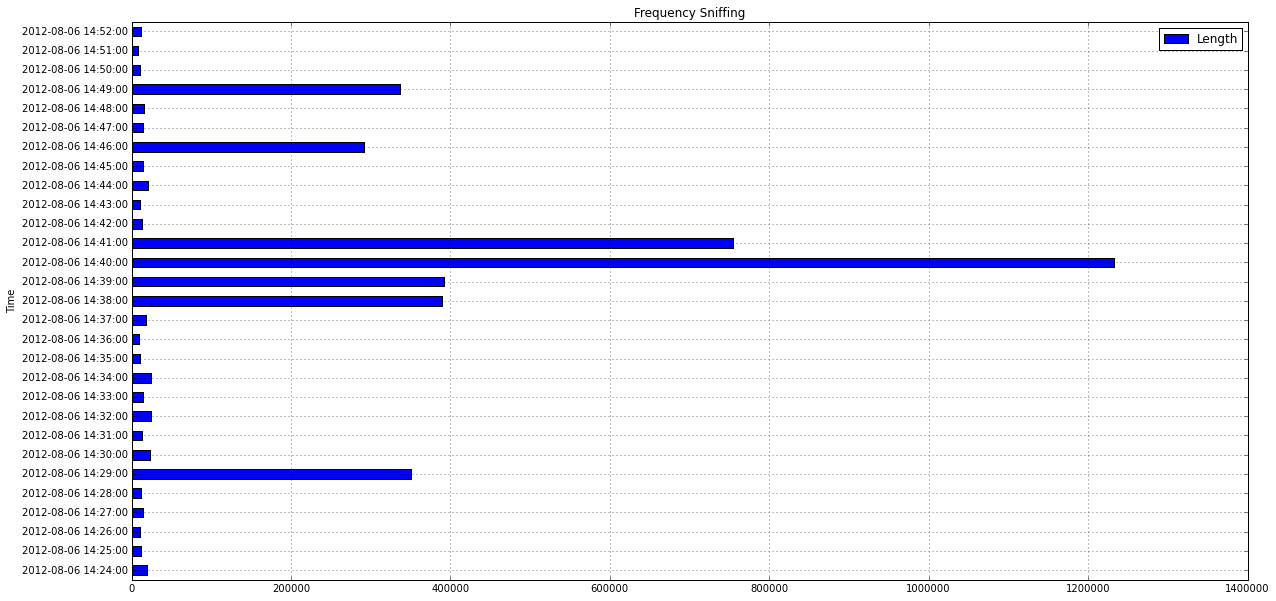

In [38]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Sniffing",figsize=(20,10),legend=True)

In [39]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Sniffing.png")

In [40]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2012-08-06 14:24:07,10.10.10.30,10.10.10.25,TCP,54,2289 > 80 [FIN] Seq=1 Win=512 Len=0,Client
1,2012-08-06 14:24:07,10.10.10.25,10.10.10.30,TCP,60,"80 > 2289 [RST, ACK] Seq=1 Ack=2 Win=0 Len=0",Server
2,2012-08-06 14:24:08,10.10.10.30,10.10.10.25,TCP,54,2290 > 80 [FIN] Seq=1 Win=512 Len=0,Client
3,2012-08-06 14:24:08,10.10.10.25,10.10.10.30,TCP,60,"80 > 2290 [RST, ACK] Seq=1 Ack=2 Win=0 Len=0",Server
4,2012-08-06 14:24:09,10.10.10.30,10.10.10.25,TCP,54,2291 > 80 [FIN] Seq=1 Win=512 Len=0,Client


In [41]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source      Destination     Protocol        
0.0.0.0     255.255.255.255 DHCP        9234
10.10.10.1  10.10.10.25     ICMP         296
            10.10.10.35     ICMP        3498
10.10.10.15 10.10.10.25     COTP        7444
                            ICMP         740

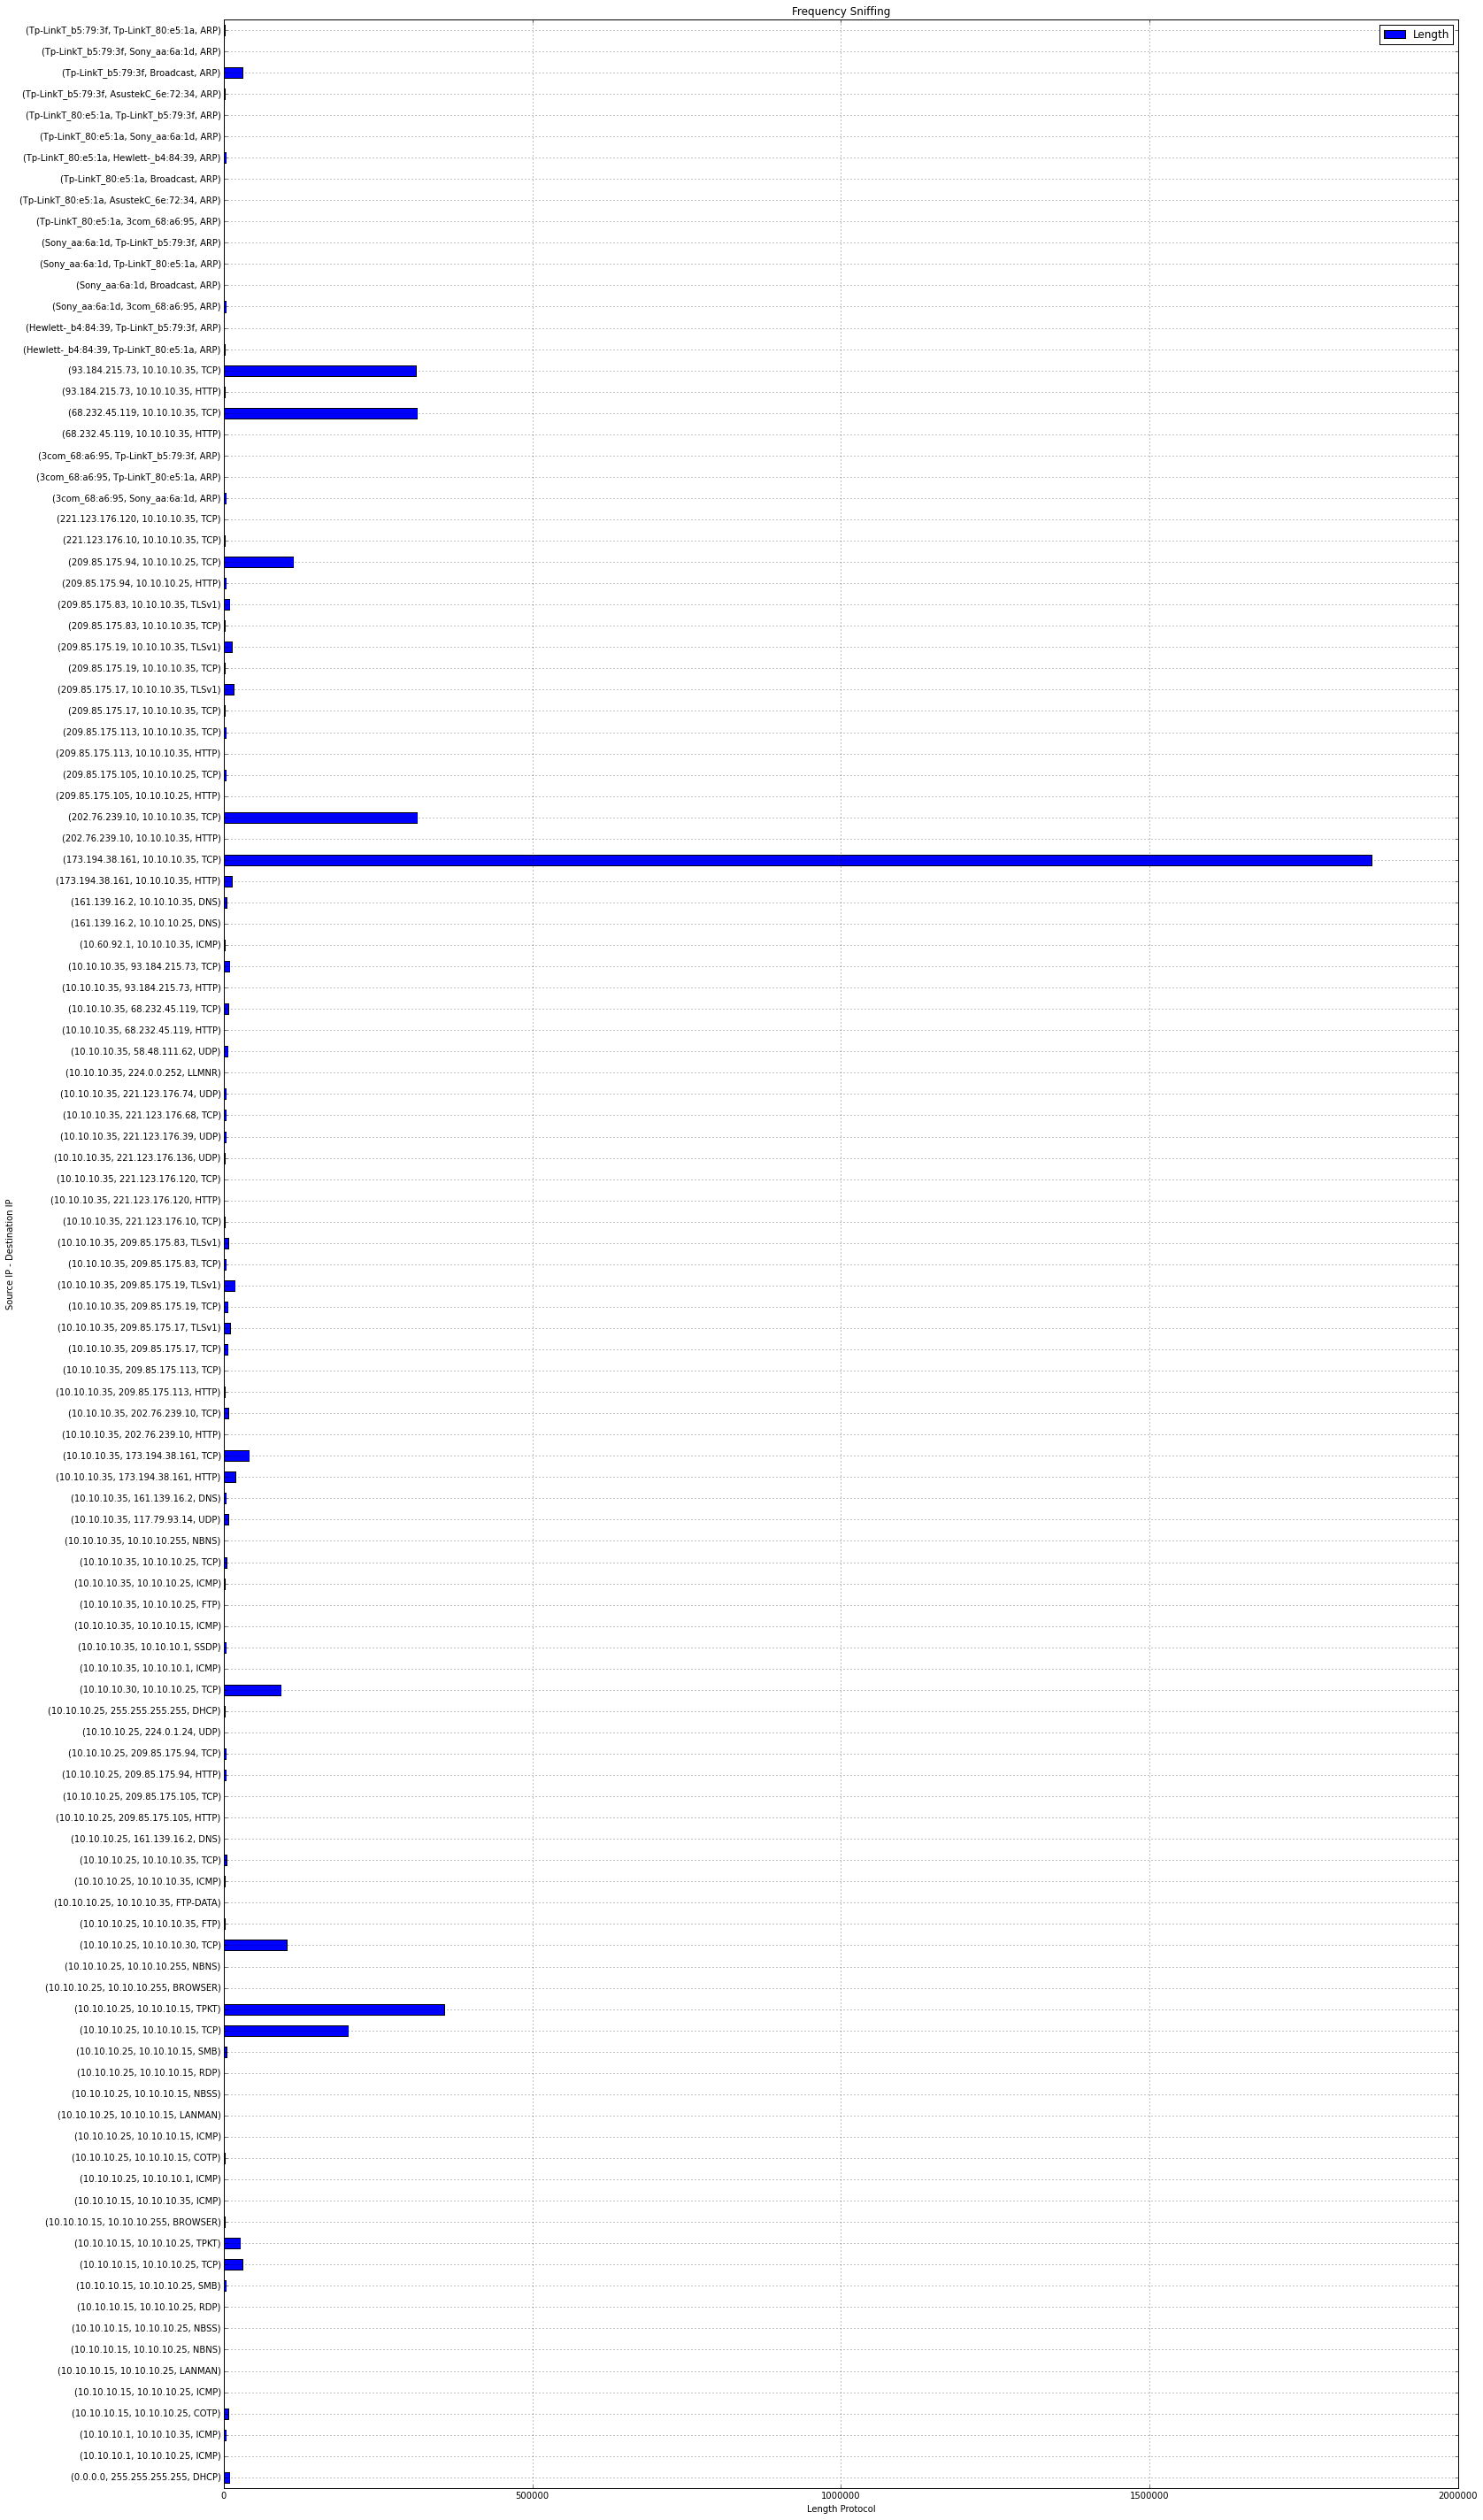

In [42]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Frequency Sniffing",figsize=(25,50))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [43]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Sniffing.png")